In [52]:
from tensorflow.keras.datasets import imdb

In [58]:
(train_data, train_labels), (test_data, test_labels)=imdb.load_data(num_words=10000)

In [54]:
len(train_data)

25000

In [55]:
len(train_labels)

25000

In [56]:
len(test_data)

25000

In [59]:
len(test_labels)

25000

In [ ]:
len(train_data[0])

218

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
word_index=imdb.get_word_index()
reverse_word_index=  dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_reeview=' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])


In [ ]:
decoded_reeview

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [ ]:
train_labels[1]

0

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [ ]:
x_train[0] #bow >>>>> BAG OF WORDS


array([0., 1., 1., ..., 0., 0., 0.])

In [60]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
metrics=['accuracy'])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,
validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 10s 142ms/step - loss: 0.4566 - accuracy: 0.8165 - val_loss: 0.3246 - val_accuracy: 0.8821
Epoch 2/20
59/59 [==============================] - 2s 38ms/step - loss: 0.2515 - accuracy: 0.9112 - val_loss: 0.2847 - val_accuracy: 0.8858
Epoch 3/20
59/59 [==============================] - 1s 18ms/step - loss: 0.1844 - accuracy: 0.9349 - val_loss: 0.2757 - val_accuracy: 0.8870
Epoch 4/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1438 - accuracy: 0.9519 - val_loss: 0.2912 - val_accuracy: 0.8867
Epoch 5/20
59/59 [==============================] - 1s 17ms/step - loss: 0.1153 - accuracy: 0.9623 - val_loss: 0.3321 - val_accuracy: 0.8791
Epoch 6/20
59/59 [==============================] - 1s 16ms/step - loss: 0.0935 - accuracy: 0.9705 - val_loss: 0.3362 - val_accuracy: 0.8811
Epoch 7/20
59/59 [==============================] - 1s 16ms/step - loss: 0.0737 - accuracy: 0.9781 - val_loss: 0.3977 - val_accuracy: 0.8755
Epoch 8/20


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

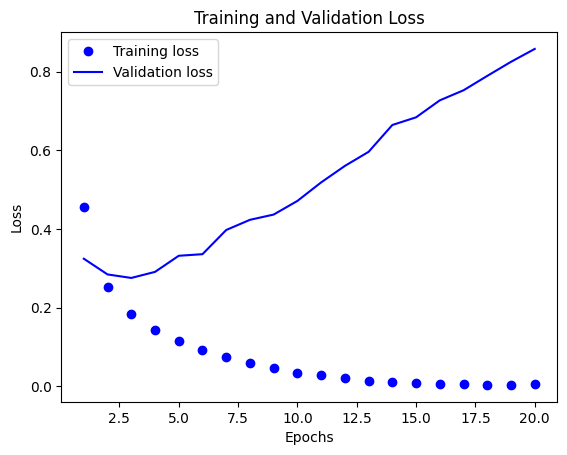

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

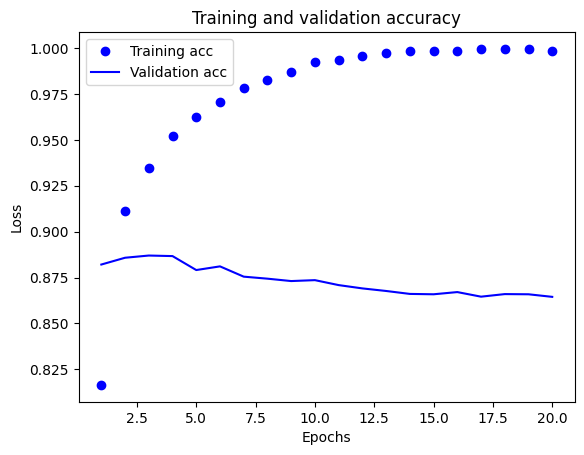

In [ ]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.456645,0.816533,0.324618,0.8821
1,0.251515,0.911200,0.284674,0.8858
2,0.184441,0.934867,0.275746,0.8870
3,0.143832,0.951933,0.291162,0.8867
4,0.115335,0.962333,0.332116,0.8791
5,0.093512,0.970467,0.336160,0.8811
6,0.073728,0.978067,0.397661,0.8755
7,0.059144,0.982667,0.423538,0.8744
8,0.046779,0.987133,0.436928,0.8731
9,0.034898,0.992533,0.471610,0.8736


In [ ]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.456645,0.816533,0.324618,0.8821
1,0.251515,0.911200,0.284674,0.8858
2,0.184441,0.934867,0.275746,0.8870
3,0.143832,0.951933,0.291162,0.8867
4,0.115335,0.962333,0.332116,0.8791
5,0.093512,0.970467,0.336160,0.8811
6,0.073728,0.978067,0.397661,0.8755
7,0.059144,0.982667,0.423538,0.8744
8,0.046779,0.987133,0.436928,0.8731
9,0.034898,0.992533,0.471610,0.8736


In [61]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)


results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 22ms/step - loss: 0.4589 - accuracy: 0.8145
Epoch 2/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2727 - accuracy: 0.9027
Epoch 3/4
49/49 [==============================] - 1s 22ms/step - loss: 0.2151 - accuracy: 0.9204
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2879 - accuracy: 0.8860


In [63]:
results

[0.2879006862640381, 0.8859999775886536]

In [64]:
model.predict(x_test)

782/782 [==============================] - 5s 3ms/step


array([[0.1830676 ],
       [0.99957436],
       [0.69707924],
       ...,
       [0.08395195],
       [0.06216871],
       [0.5381787 ]], dtype=float32)

In [65]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])